In [1]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import chain
from matplotlib import pyplot as plt

In [2]:
df = pd.read_pickle(r'../data/clustered_test_998_group_4.pkl')
df = df.drop(df.columns[[1,2,4,5,3]], axis=1)
pd.set_option('max_colwidth', None)
df.head(1)

,Content
14053,"Euro Bölgesi büyüme öngörüsü altı yılın en düşüğünde\nIMF Euro Bölgesi büyüme öngörüsünü altı yılın en düşük düzeyine çekti\nUluslararası Para Fonu (IMF), Bölgesel Ekonomik Görünüm raporunda Euro Bölgesi gayrisafi yurt içi hasılasının son altı yılın en düşük büyüme hızına gerileyerek, 2019 yılında yüzde 0.1 düşüşle yüzde 1.2 düzeyinde gerçekleşeceğini öngördü.\nEuro Bölgesi için 2020 ve 2021 yılına ilişkin büyüme tahminlerini yüzde 1.5'ten yüzde 1.4'e düşüren IMF, düşüşün nedeni olarak Almanya ve İtalya ekonomilerinde görülen zayıflamayı gösterdi.IMF, 19 ülkeden oluşan Euro Bölgesi'nin bu yıl için büyüme öngörüsünü, daha önceki yüzde 1.3 düzeyinden yüzde 1.2'ye revize etti. Euro Bölgesi'nin 2018 büyümesi yüzde 1.9 düzeyindeydi.\nAlmanya ve İtalya için önceki büyüme tahminlerini revize eden IMF, yavaşlamanın çoğunlukla euro bölgesinin en büyük ekonomisi Almanya'daki zayıf büyüme ve üçüncü büyük ekonomisi İtalya'daki durgunluktan kaynaklandığını ifade etti.\nIMF Almanya ekonomisindeki büyüme beklentisini Nisan ayı tahmini olan yüzde 0.8'den yüzde 0.5'e ve İtalyan ekonomisinin de duraklayacağını öngörerek büyüme beklentisini yüzde 0.9'dan yüzde 0.5'e düşürdü.\nETİKETLER :\n \n IMF\n euro bölgesi"


In [3]:
myRegex = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
stop_word_list = nltk.corpus.stopwords.words('turkish')
def clean_text(text):
    text = text.lower()
    text = re.sub('\[*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(myRegex), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\t', '', text)
    text = re.sub('\n', '', text)
    word_tokens = nltk.word_tokenize(text)
    filtered_sentences = [w for w in word_tokens if not w in stop_word_list]

    text = ' '.join(filtered_sentences)
    return text
    
round1 = lambda x: clean_text(x)

df = pd.DataFrame(df['Content'].apply(round1))

In [4]:
df['ready_data'] = df['Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head(1)

,Content,ready_data
14053,euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu imf bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt içi hasılasının son altı yılın düşük büyüme hızına gerileyerek yılında yüzde . düşüşle yüzde . düzeyinde gerçekleşeceğini öngördü.euro bölgesi yılına ilişkin büyüme tahminlerini yüzde . ten yüzde . e düşüren imf düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi.imf ülkeden oluşan euro bölgesi nin yıl büyüme öngörüsünü önceki yüzde . düzeyinden yüzde . ye revize etti . euro bölgesi nin büyümesi yüzde . düzeyindeydi.almanya i̇talya önceki büyüme tahminlerini revize eden imf yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti.imf almanya ekonomisindeki büyüme beklentisini nisan ayı tahmini olan yüzde . den yüzde . e i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde . dan yüzde . e düşürdü.eti̇ketler imf euro bölgesi,euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt hasılasının altı yılın düşük büyüme hızına gerileyerek yılında yüzde düşüşle yüzde düzeyinde gerçekleşeceğini öngördü.euro bölgesi yılına ilişkin büyüme tahminlerini yüzde yüzde düşüren düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi.imf ülkeden oluşan euro bölgesi büyüme öngörüsünü önceki yüzde düzeyinden yüzde revize etti euro bölgesi büyümesi yüzde düzeyindeydi.almanya i̇talya önceki büyüme tahminlerini revize eden yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti.imf almanya ekonomisindeki büyüme beklentisini nisan tahmini olan yüzde yüzde i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde yüzde düşürdü.eti̇ketler euro bölgesi


In [5]:
tokenized_doc = df['ready_data'].apply(lambda x: x.split('.'))
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_word_list])
tokenized_doc = tokenized_doc.tolist()

In [6]:
temp_detokenized_doc = []
for i in range(len(tokenized_doc)):
    t = ' '.join(tokenized_doc[i])
    temp_detokenized_doc.append(t)
    #if i in tokenized_doc:

detokenized_doc = []      
for items in temp_detokenized_doc:
    item = items.split('.')
    detokenized_doc.append(item)

detokenized_doc = list(chain.from_iterable(detokenized_doc))
len(detokenized_doc)

998

In [7]:
vectorizer = TfidfVectorizer(input=detokenized_doc, stop_words=stop_word_list,
                             max_df = 0.8, use_idf = True, ngram_range=(1,3))
model = vectorizer.fit_transform(detokenized_doc)

print(model.shape) 
terms = vectorizer.get_feature_names()

(998, 54673)


In [8]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(model[0:1], model).flatten()
cosine_similarities.shape

(998,)

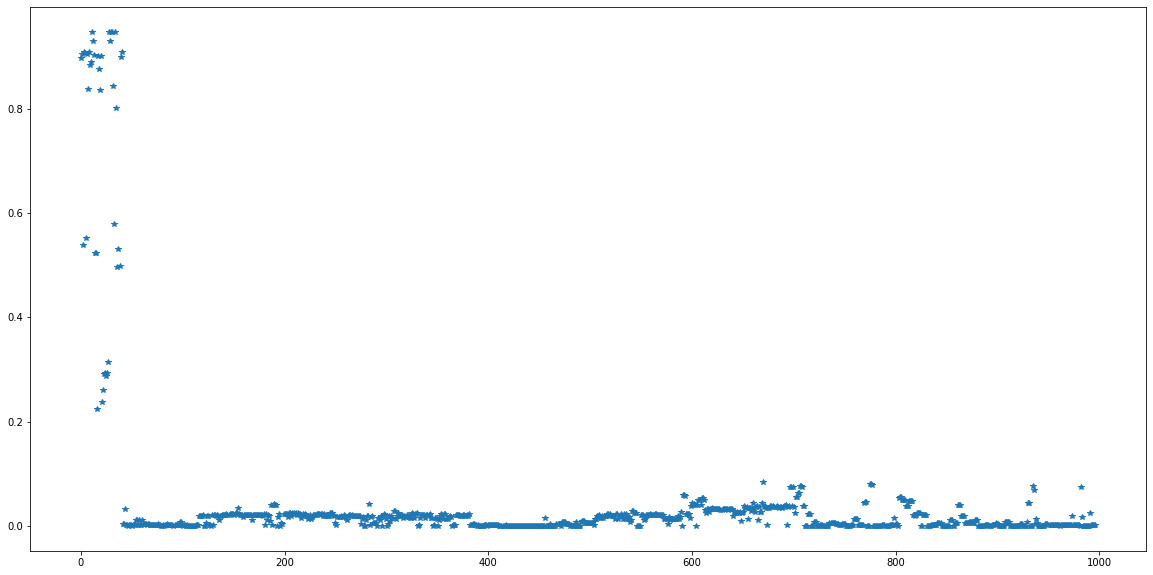

In [9]:
related_docs_indices = cosine_similarities.argsort()

list_cos = []
cosine_similarities[related_docs_indices]
for item in cosine_similarities:
    if item<1:
        list_cos.append(item)
#np.where(cosine_similarities<0.01)
plt.figure(figsize=(20,10))
plt.plot(list_cos, '*')
plt.show()


In [10]:
zip_list = list(zip(cosine_similarities, related_docs_indices))

prediction_df = pd.DataFrame(columns = ['News', 'Cluster'])

for similarity, index in zip_list:
    if similarity == 0:
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster A'}, ignore_index=True)
    elif(similarity>0) & (similarity<= 0.005):
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster B'}, ignore_index=True)
    elif(similarity>0.005) & (similarity<= 0.5):
        prediction_df = prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster C'}, ignore_index=True)
    elif(similarity>0.5) & (similarity<= 1.01):
        prediction_df =prediction_df.append({'News': detokenized_doc[index], 'Cluster': 'Cluster D'}, ignore_index=True)

In [11]:
prediction_df

,News,Cluster
0,anali̇z paritesi dinamik menkul dinamik menkul https dinamikmenkul com tarafından hazırlanan paritesi analizi gbpusd parite değer kaybetmeyi sürdürüyor cuma gününden itibaren kademeli şekilde değer kaybeden parite desteğine çekildi paritede yaşanan satış baskısının devam etmesi durumunda seviyesi altında desteğine doğru geri çekilmeler sertleşebilir aksi durumda tepki alımlarının yaşanması yükseliş görülmesi halinde direnci güncelliğini korumaktadır destek burada alan yatırım bilgi yorum tavsiyeler yatırımdanışmanlığı kapsamında değildir yatırım danışmanlığı hizmeti aracı kurumlar portföy yönetim şirketleri mevduat kabul etmeyenbankalar müşteri arasında imzalanacak yatırım danışmanlığı sözleşmesi çerçevesinde sunulmaktadır burada alan yorum vetavsiyeler yorum tavsiyede bulunanların kişisel görüşlerinedayanmaktadır görüşler mali durumunuz risk getiri tercihlerinize uygun olmayabilir nedenle sadece burada alan bilgilere dayanılarak yatırım kararı verilmesi beklentilerinize uygun sonuçlar doğurmayabilir foreks haber merkezi email protected http www foreks com http twitter com foreksturkey,Cluster D
1,anali̇z altın fiyatları işıkfx işıkfx http www isikfx com tarafından hazırlanan altın analizi altin ticaret savaşlarında yaşanan iyimserlik sonrasında satıcılı seyrin ağırlık kazandığı değerli metalde ticaret anlaşmasını imzalamak üzere yapılacak trump toplantısının aralık ayına kadar ertelenebileceği haber akışlarıyla birlikte toparlanma hareketi görüldü durumda değer metal direncinin üzerinde işlem görmekte süre zarfında ticaret anlaşmasın yönelik gelişmelerle birlikte direnç seviyeleri gündemimize gelebilir ancak aksi yönde satış yönlü işlemlerin yeniden ağırlık kazanması durumunda seviyesi önemli olacaktır seviyesinin kırılması halinde noktaları takip edilebilir burada alan yatırım bilgi yorum tavsiyeler yatırımdanışmanlığı kapsamında değildir yatırım danışmanlığı hizmeti aracı kurumlar portföy yönetim şirketleri mevduat kabul etmeyenbankalar müşteri arasında imzalanacak yatırım danışmanlığı sözleşmesi çerçevesinde sunulmaktadır burada alan yorum vetavsiyeler yorum tavsiyede bulunanların kişisel görüşlerinedayanmaktadır görüşler mali durumunuz risk getiri tercihlerinize uygun olmayabilir nedenle sadece burada alan bilgilere dayanılarak yatırım kararı verilmesi beklentilerinize uygun sonuçlar doğurmayabilir foreks haber merkezi email protected http www foreks com http twitter com foreksturkey,Cluster D
2,bakan albayrak samsun önemli açıklamalarhazine maliye bakanı berat albayrak türkiye değişim başlıyor sloganıyla başlatılan dünyası buluşma programları kapsamında samsun konuşuyor hazine maliye bakanı berat albayrak türkiye değişim başlıyor sloganıyla başlatılan dünyası buluşma programları kapsamında samsun konuşuyor bakan albayrak açıklamalarından satır başları,Cluster D
3,bakan albayrak samsun önemli açıklamalarhazine maliye bakanı berat albayrak türkiye değişim başlıyor sloganıyla başlatılan dünyası buluşma programları kapsamında samsun konuşuyor hazine maliye bakanı berat albayrak türkiye değişim başlıyor sloganıyla başlatılan dünyası buluşma programları kapsamında samsun konuşuyor hazine maliye bakanı berat albayrak türkiye değişim başlıyor sloganıyla başlatılan dünyası buluşma programları kapsamında samsun konuşuyor bakan albayrak açıklamalarından satır başları ekonomide yaşadığımız saldırıların hiçbiri birbirinden bağımsız değil ülkemiz yoğun kuşatma planıyla mücadele veriyor tehditlerin hedefi ülkemizin bekasını yıkmaktı bertaraf edildi ülkemizi faiz enflasyon sarmalına almak yolu denediler kaynak,Cluster D
4,anali̇z altın fiyatları işıkfx işıkfx http www isikfx com tarafından hazırlanan altın analizi altin ticaret savaşlarında yaşanan iyimserlik sonrasında satıcılı seyrin ağırlık kazandığı değerli metalde ticaret anlaşmasını imzalamak üzere yapılacak trump toplantısının aralık ayına kadar ertelenebileceği haber akışlarıyla birlikte toparlanma hareketi görüldü durumda değer metal direncinin üzerinde işlem gö

In [12]:
print('CUMLENIN ASLI:', detokenized_doc[0])
print('\n')
print('EN ALAKASIZ:', detokenized_doc[834])
print('\n')
print('EN ALAKALI:', detokenized_doc[12])

CUMLENIN ASLI: euro bölgesi büyüme öngörüsü altı yılın düşüğündeimf euro bölgesi büyüme öngörüsünü altı yılın düşük düzeyine çektiuluslararası para fonu bölgesel ekonomik görünüm raporunda euro bölgesi gayrisafi yurt hasılasının altı yılın düşük büyüme hızına gerileyerek yılında yüzde düşüşle yüzde düzeyinde gerçekleşeceğini öngördü euro bölgesi yılına ilişkin büyüme tahminlerini yüzde yüzde düşüren düşüşün nedeni olarak almanya i̇talya ekonomilerinde görülen zayıflamayı gösterdi imf ülkeden oluşan euro bölgesi büyüme öngörüsünü önceki yüzde düzeyinden yüzde revize etti euro bölgesi büyümesi yüzde düzeyindeydi almanya i̇talya önceki büyüme tahminlerini revize eden yavaşlamanın çoğunlukla euro bölgesinin büyük ekonomisi almanya daki zayıf büyüme üçüncü büyük ekonomisi i̇talya daki durgunluktan kaynaklandığını ifade etti imf almanya ekonomisindeki büyüme beklentisini nisan tahmini olan yüzde yüzde i̇talyan ekonomisinin duraklayacağını öngörerek büyüme beklentisini yüzde yüzde düşürdü eti

In [13]:
from joblib import dump
dump(model, '../model/model.joblib') 

['../model/model.joblib']

In [1]:
from joblib import load
clf = load('../model/model.joblib') 

<1x54673 sparse matrix of type '<class 'numpy.float64'>'
	with 299 stored elements in Compressed Sparse Row format>